In [1]:
import numpy as np
import pandas as pd

from sklearn.utils import shuffle

In [2]:
import platform
platform.platform()

'Windows-10-10.0.19044-SP0'

In [3]:
df = pd.read_csv("RECUENTO con clases.csv", sep=";", index_col=0, encoding="utf-8", usecols=["Código de muestra", "Régimen de alimentación"]).dropna()

In [4]:
df.head()

,Régimen de alimentación
Código de muestra,
B001,Bellota
B002,Bellota
B003,Bellota
B004,Bellota
B005,Bellota


In [4]:
img_labels = shuffle(df["Régimen de alimentación"].apply(lambda x: int(x == "Bellota"))).to_dict()

In [5]:
X = pd.read_csv(f"images/{df.index[803]}.csv", sep=";", index_col=0)
X

,0.000,0.006,0.013,0.020,0.026,0.033,0.040,0.046,0.053,0.060,...,29.933,29.940,29.946,29.953,29.960,29.966,29.973,29.980,29.986,29.993
RetTime [s] \ DriftTime [ms],,,,,,,,,,,,,,,,,,,,,
0.00,42,76,86,77,57,29,2,-56,-168,-259,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
0.99,40,82,93,86,60,31,6,-52,-171,-266,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
1.98,42,84,97,88,68,32,0,-58,-171,-262,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
2.97,34,71,89,86,68,38,8,-39,-152,-247,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
3.96,44,82,93,83,58,27,0,-56,-168,-262,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615.68,40,78,87,76,52,25,0,-53,-168,-261,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
1616.67,39,78,91,80,59,28,2,-51,-163,-252,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
1617.66,41,76,86,78,58,33,10,-45,-162,-261,...,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768


In [27]:
X.shape

(1637, 4500)

In [93]:
import skimage.measure
skimage.measure.block_reduce(X, 10, np.max).nbytes

590400

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

(164, 300)
(1637, 4500) (1637, 4500) (1637, 4500)


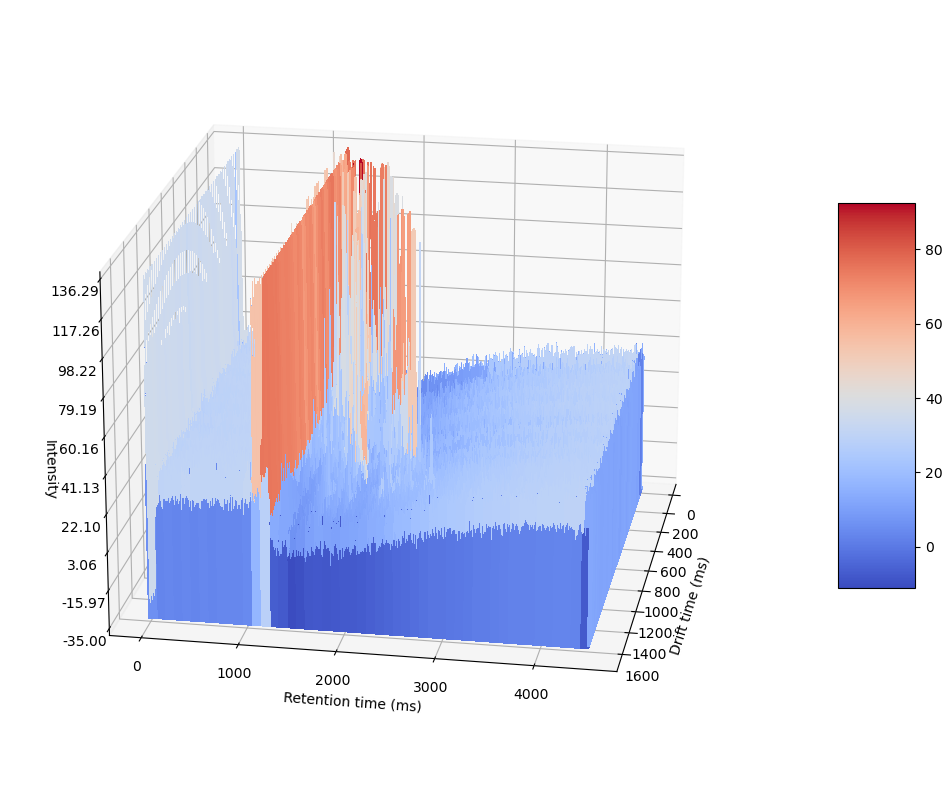

In [151]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print(_X.shape)
hf = plt.figure(figsize=(15, 10))
ha = hf.add_subplot(projection='3d')

X_, Y_ = numpy.meshgrid(range(X.shape[1]), range(X.shape[0]))  # `plot_surface` expects `x` and `y` data to be 2D
print(X_.shape, Y_.shape, X.shape)
surf = ha.plot_surface(Y_, X_, transform_df(X), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ha.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ha.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
hf.colorbar(surf, shrink=0.5, aspect=5)
ha.view_init(20, 10, vertical_axis="z")
plt.ylabel("Retention time (ms)")
plt.xlabel("Drift time (ms)")
ha.set_zlabel("Intensity")
plt.savefig("trans_3d.png")
plt.show()

# for angle in range(0, 360, 10):
#     ha.view_init(30, angle)
#     plt.show()

(164, 300)
(164, 300) (164, 300) (1637, 4500)


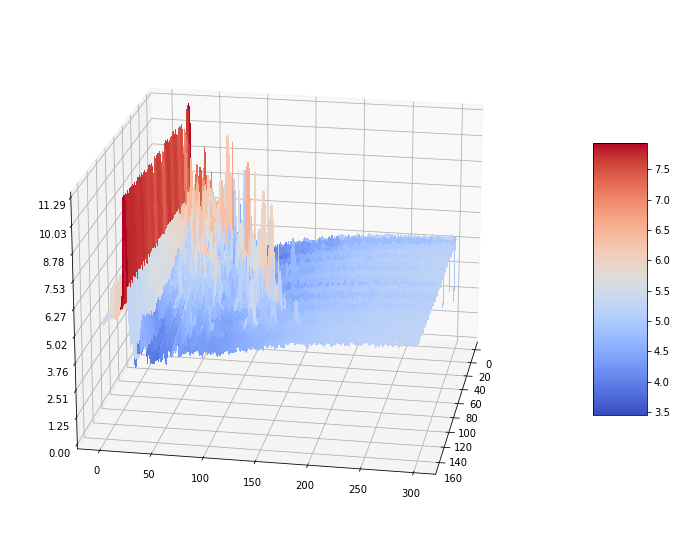

In [109]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

_X = skimage.measure.block_reduce(transform_df_log(X), 10, np.max)[:, 100:400]
print(_X.shape)
hf = plt.figure(figsize=(15, 10))
ha = hf.add_subplot(projection='3d')

X_, Y_ = numpy.meshgrid(range(_X.shape[1]), range(_X.shape[0]))  # `plot_surface` expects `x` and `y` data to be 2D
print(X_.shape, Y_.shape, X.shape)
surf = ha.plot_surface(Y_, X_, _X, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ha.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ha.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
hf.colorbar(surf, shrink=0.5, aspect=5)
ha.view_init(20, 10, vertical_axis="z")

plt.show()

# for angle in range(0, 360, 10):
#     ha.view_init(30, angle)
#     plt.show()

(164, 300)
(1637, 4500) (1637, 4500) (1637, 4500)


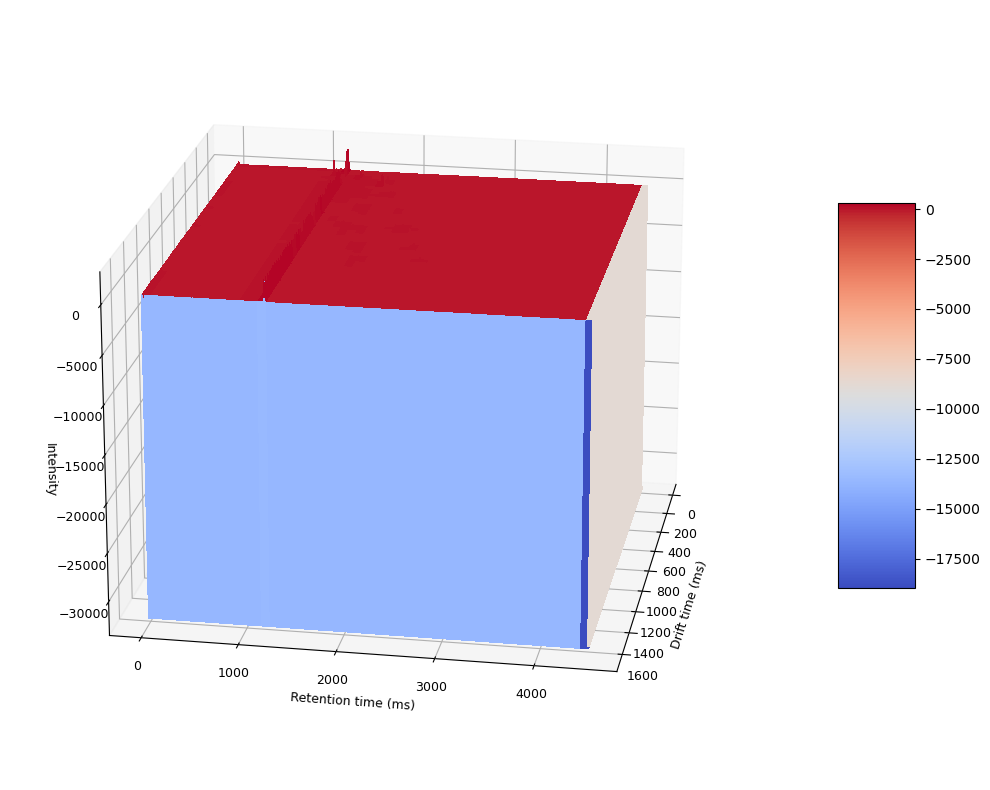

In [150]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print(_X.shape)
hf = plt.figure(figsize=(15, 10))
ha = hf.add_subplot(projection='3d')

X_, Y_ = numpy.meshgrid(range(X.shape[1]), range(X.shape[0]))  # `plot_surface` expects `x` and `y` data to be 2D
print(X_.shape, Y_.shape, X.shape)
surf = ha.plot_surface(Y_, X_, X, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ha.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ha.zaxis.set_major_formatter('{x:.02f}')
plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({"font.size": 9})
# Add a color bar which maps values to colors.
hf.colorbar(surf, shrink=0.5, aspect=5)
ha.view_init(20, 10, vertical_axis="z")
plt.ylabel("Retention time (ms)")
plt.xlabel("Drift time (ms)")
ha.set_zlabel("Intensity")
plt.savefig("raw_3d.png")
plt.show()

# for angle in range(0, 360, 10):
#     ha.view_init(30, angle)
#     plt.show()

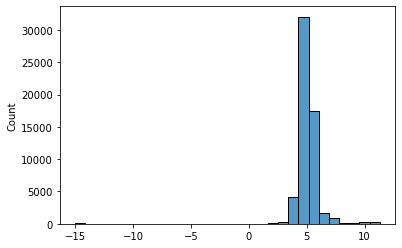

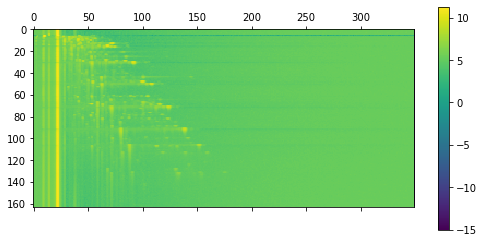

In [94]:

import math
def transform_df_log(dataframe: pd.DataFrame) -> pd.DataFrame:
    def transform_element(element: int) -> int:
        if element < -0.1:
            return -math.log2(-element)

        if element > 0.1:
            return math.log2(element)
        return math.log2(0.1)

    return dataframe.apply(lambda r: r.apply(transform_element))
sns.histplot(skimage.measure.block_reduce(transform_df_log(X.iloc[:, 1000:]).to_numpy(), 10, np.max).flatten(), bins=30)
plt.show()

plt.matshow(skimage.measure.block_reduce(transform_df_log(X.iloc[:, 1000:]).to_numpy(), 10, np.max))
plt.colorbar()
plt.show()

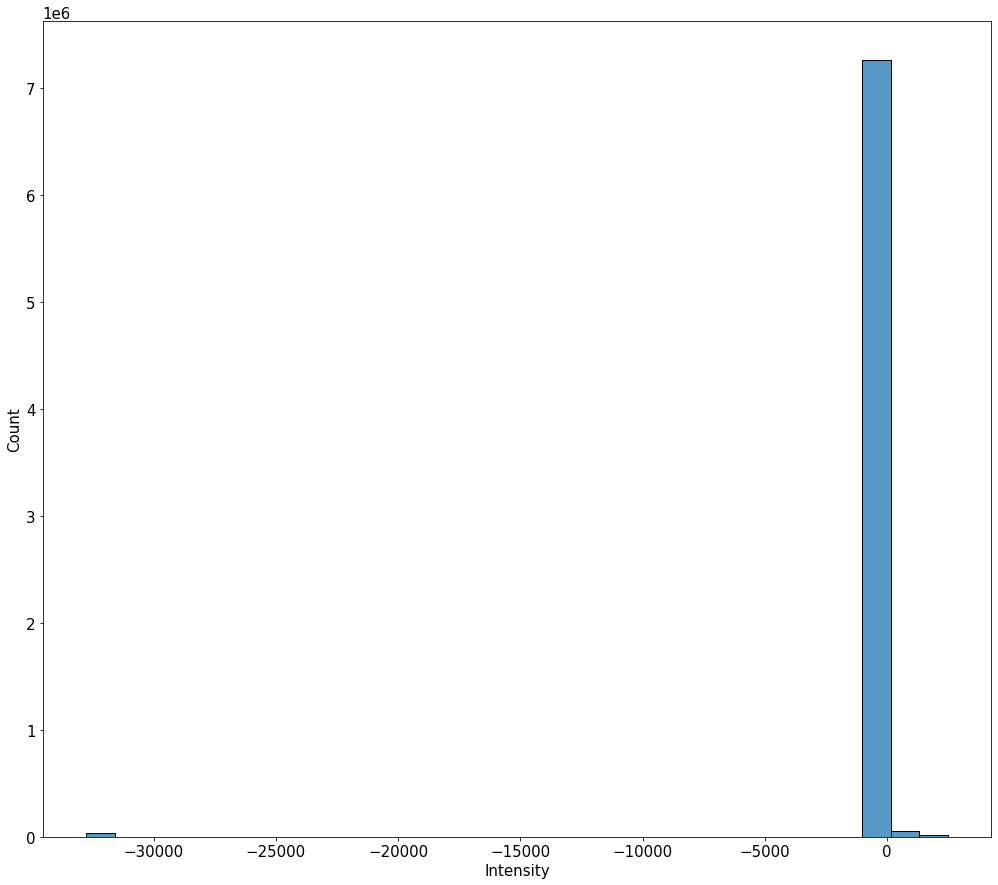

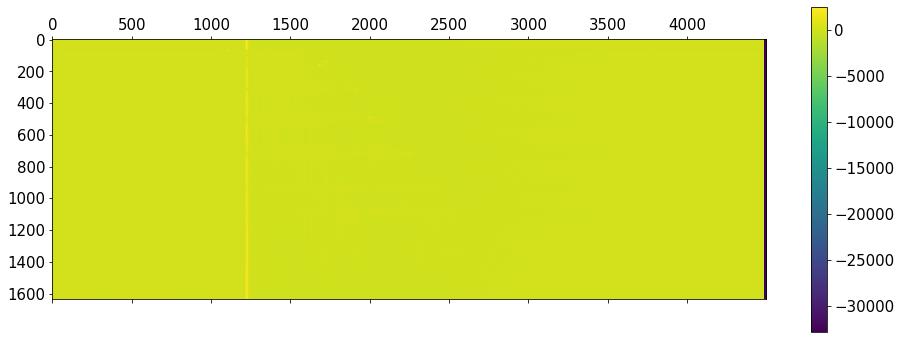

In [132]:
# Sin transformar
plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams.update({'font.size': 15})
sns.histplot(X.to_numpy().flatten(), bins=30)
plt.xlabel("Intensity")
plt.savefig("raw_histogram.png")
plt.show()

plt.matshow(X)
plt.colorbar()
plt.savefig("raw_2d.png")
plt.show()

In [9]:
import math

def transform_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    def transform_element(element: int) -> int:
        if element < -20:
            return -20 - math.log2(-element)

        if element > 125:
            return 125 + math.log2(element)
        
        return element
    return dataframe.apply(lambda r: r.apply(transform_element))

# Transformando el 
plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams.update({'font.size': 15})
sns.histplot(transform_df(X).to_numpy().flatten(), bins=30)
plt.xlabel("Intensity")
plt.savefig("trans_histogram.png")
plt.show()

plt.matshow(transform_df(X))
plt.colorbar()
plt.ylabel("Retention time (ms)")
plt.xlabel("Drift time (ms)")
plt.savefig("trans_2d.png")
plt.show()

NameError: name 'plt' is not defined

In [121]:
plt.rcParams["figure.figsize"]

[6.0, 4.0]

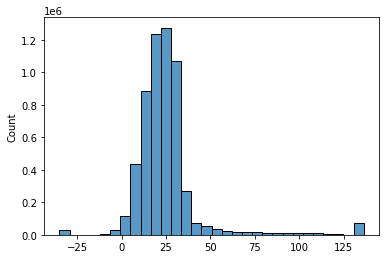

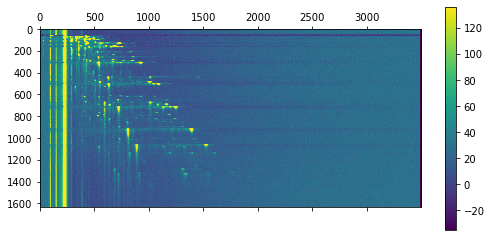

In [16]:
# Filtrando y transformando el df
sns.histplot(transform_df(X.iloc[:, 1000:]).to_numpy().flatten(), bins=30)
plt.show()

plt.matshow(transform_df(X.iloc[:, 1000:]))
plt.colorbar()
plt.show()

In [17]:
def transform_df_to_zero(dataframe: pd.DataFrame) -> pd.DataFrame:
    def transform_element(element: float) -> float:
        if element < 40:
            return 0

        if element > 125:
            return 125 + math.log2(element)
        
        return element
    return dataframe.apply(lambda r: r.apply(transform_element))

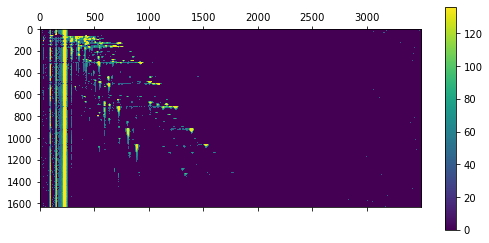

In [18]:
plt.matshow(transform_df_to_zero(X.iloc[:, 1000:]))
plt.colorbar()

In [21]:
import joblib

for key, value in joblib.load("results.joblib").items():
    print(key, np.mean(value))

pa1_identity 0.4835164835164835
pa1_onlyTransform 0.6648351648351648
pa1_transformAndFilter 0.7417582417582418
pa1_onlyFilter 0.5659340659340659
pa2_identity 0.4835164835164835
pa2_onlyTransform 0.6648351648351648
pa2_transformAndFilter 0.7417582417582418
pa2_onlyFilter 0.5659340659340659
svm_identity 0.4945054945054945
svm_onlyTransform 0.5494505494505495
svm_transformAndFilter 0.7692307692307693
svm_onlyFilter 0.4835164835164835
lr_identity 0.46153846153846156
lr_onlyTransform 0.8186813186813187
lr_transformAndFilter 0.8076923076923077
lr_onlyFilter 0.5


In [2]:
from scipy.sparse import csc_matrix, save_npz, load_npz, hstack, vstack
# csc_matrix(transform_df_to_zero(X.iloc[:, 1000:]))

In [38]:
X.to_numpy().astype(np.int32)

array([[-32768, -32768, -32768, ...,     25,     22,     24],
       [-32768, -32768, -32768, ...,     26,     26,     26],
       [-32768, -32768, -32768, ...,     22,     22,     23],
       ...,
       [-32768, -32768, -32768, ...,     25,     25,     26],
       [-32768, -32768, -32768, ...,     21,     21,     19],
       [-32768, -32768, -32768, ...,     24,     24,     26]])

In [7]:
data = []

In [9]:
i = 0
for key in list(df.index):
    if i % 25 == 0:
        print(i)
    i+=1
    try:
        with open(f"images/{key}.csv") as file:
            data.append(skimage.measure.block_reduce(
                pd.read_csv(f"images/{key}.csv", sep=";",
                                             usecols=lambda c: c != "RetTime [s] \ DriftTime [ms]").iloc[:, 1000:].to_numpy(dtype=np.int8), 10, np.max).flatten())
    except Exception as e:
        print(e)


0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
[Errno 2] No such file or directory: 'images/V060.csv'
825
850
875
900
925
950
975


In [10]:
data = np.array(data)

In [11]:
np.savez_compressed("simple_data.npz", data)

In [ ]:
start, end = 200, 300
X_test = [std.fit_transform(pd.read_csv(f"images/{key}.csv", sep=";", index_col=0).to_numpy()).reshape(1, -1)[0]
     for key in list(img_labels)[start:end]]

y = pac.predict(X_test)
np.sum(y == np.array(list(img_labels.values())[start:end])) / (end - start)

In [7]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(data, list(df["Régimen de alimentación"].apply(lambda x: int(x == "Bellota")).drop("V060"))[:800])

In [75]:
for x, y in zip(data, list(df["Régimen de alimentación"].apply(lambda x: int(x == "Bellota")).drop("V060")))

491

In [89]:
arrays = [m.astype(np.int8).toarray() for m in data]

In [73]:
# V060
df["Régimen de alimentación"]

Código de muestra
B001     Bellota
B002     Bellota
B003     Bellota
B004     Bellota
B005     Bellota
          ...   
SJ128    Bellota
SJ130    Bellota
SJ131    Bellota
SJ132    Bellota
SJ133    Bellota
Name: Régimen de alimentación, Length: 982, dtype: object

In [7]:
from scipy.sparse import load_npz
data = load_npz("data.npz")

AttributeError: module 'numpy' has no attribute 'load_npz'

In [95]:
arrays = np.array(arrays)

In [94]:
import gc
gc.collect()

13843

In [125]:
arrays_flat = np.array([array.reshape(1, -1)[0] for array in arrays[:800]])

In [134]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(100)
transformed = pca.fit_transform(sparse_arrays_flat)

MemoryError: Unable to allocate 4.70 GiB for an array with shape (5729500, 110) and data type float64

In [129]:
save_npz("data.npz", csc_matrix(arrays_flat))

In [130]:
sparse_arrays_flat = csc_matrix(arrays_flat)

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
clf = GridSearchCV(SVC(), param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df["Régimen de alimentación"].drop("V060").apply(lambda x: int(x == "Bellota")).to_numpy(), test_size=0.33, random_state=42)

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
score = svc.score(X_test, y_test)
score

0.8209876543209876

In [81]:
clf.cv_results_

{'mean_fit_time': array([47.72667427, 42.55207939, 46.1056942 , 53.19790969, 44.03888836,
        41.9218142 , 42.73806567, 41.31206412, 41.85692668, 41.88475647,
        41.61854577, 41.06527534]),
 'std_fit_time': array([2.68743187, 0.26911129, 2.56638552, 2.3285429 , 1.78687838,
        0.8683146 , 1.39625569, 1.23452831, 1.46556907, 1.24147109,
        1.38588572, 1.30166791]),
 'mean_score_time': array([ 9.80844245,  8.8261426 , 11.03959646,  9.57983093, 19.79602237,
        17.03013153, 17.88826976, 16.98684425, 19.23664751, 16.72861314,
        18.00047884, 15.45787497]),
 'std_score_time': array([0.40264724, 0.26239079, 1.95712987, 1.49884873, 0.30776369,
        0.5564163 , 0.67547892, 0.71653901, 1.37167936, 0.72875192,
        0.95170327, 1.97784513]),
 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_va

In [82]:
param_grid = [
  {'C': [10000], 'kernel': ['linear']},
  {'C': [1, 10, 1000], 'gamma': [0.001, 'scale'], 'kernel': ['rbf']},
  {'C': [1, 1000], 'degree': [2, 3], 'kernel': ['poly']},
  {'kernel': ["sigmoid"]}
 ]
clf2 = GridSearchCV(SVC(class_weight={0: 0.5, 1: 0.5}), param_grid, n_jobs=-1)
clf2.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight={0: 0.5, 1: 0.5}), n_jobs=-1,
             param_grid=[{'C': [10000], 'kernel': ['linear']},
                         {'C': [1, 10, 1000], 'gamma': [0.001, 'scale'],
                          'kernel': ['rbf']},
                         {'C': [1, 1000], 'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['sigmoid']}])

In [85]:
clf2.cv_results_

{'mean_fit_time': array([41.6597549 , 44.57938118, 47.6222928 , 55.66326752, 51.67659097,
        53.82829404, 55.1082428 , 51.67372217, 49.94302301, 52.97023115,
        51.51395688, 56.26570854]),
 'std_fit_time': array([0.15606644, 2.47529134, 2.44897127, 3.1061081 , 4.09796669,
        5.29575649, 4.56154999, 4.66184851, 1.78641048, 0.97633791,
        0.62054376, 3.76281674]),
 'mean_score_time': array([ 8.39762988, 21.65763235, 22.28999605, 21.7403348 , 24.32025447,
        25.03650475, 21.15450449, 10.08292842, 11.22174101, 11.83771605,
        10.77245355, 11.84380116]),
 'std_score_time': array([0.60805553, 1.61524617, 3.13335439, 3.05850918, 1.70033942,
        2.75497646, 2.95320483, 1.00407848, 1.75982865, 0.93691154,
        0.55495624, 3.10050149]),
 'param_C': masked_array(data=[10000, 1, 1, 10, 10, 1000, 1000, 1, 1, 1000, 1000, --],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,  True],
        fill_v

In [86]:
clf2.best_estimator_

SVC(C=1, class_weight={0: 0.5, 1: 0.5}, kernel='poly')

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

classifiers = dict(
    svm=GridSearchCV(SVC(class_weight={0: 0.5, 1: 0.5}), [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ], n_jobs=-1),
        log=GridSearchCV(SGDClassifier(n_jobs=-1, class_weight={0: 0.5, 1: 0.5}), [
  {"early_stopping": [False, True], 'loss': ['log_loss', 'modified_huber'], "alpha": [0.0001, 0.001, 0.00001]},
 ], n_jobs=-1),
    gbt=GridSearchCV(GradientBoostingClassifier(), [
  {'n_estimators': [20], 'loss': ['exponential', 'log_loss'], "max_depth": [3, 5]},
 ], n_jobs=-1),
    rf=GridSearchCV(RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}), [
  {'n_estimators': [100, 20, 200], 'min_samples_split': [2, 4], "max_depth": [3, 5]},
 ], n_jobs=-1),
)

In [17]:
data_random, y_random = shuffle(data, df["Régimen de alimentación"].drop("V060").apply(lambda x: int(x == "Bellota")).to_numpy(),  random_state=42)
for classifier in classifiers.values():
    classifier.fit(data_random, y_random)

C:\Users\david\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "C:\Users\david\anacon

In [18]:
for classifier in classifiers.values():
    print(classifier.best_estimator_, classifier.best_score_)

SVC(C=1, class_weight={0: 0.5, 1: 0.5}, kernel='linear') 0.9490158499948202
SGDClassifier(alpha=1e-05, class_weight={0: 0.5, 1: 0.5}, loss='modified_huber',
              n_jobs=-1) 0.8563917952967989
GradientBoostingClassifier(loss='exponential', n_estimators=20) 0.8705221174764322
RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=5,
                       n_estimators=200) 0.8603076763700404


In [20]:
classifiers_v2 = dict(
        log=GridSearchCV(SGDClassifier(n_jobs=-1, class_weight={0: 0.5, 1: 0.5}), [
  {"early_stopping": [False, True], 'loss': ['log', 'modified_huber'], "alpha": [0.0001, 0.001, 0.00001]},
 ], n_jobs=-1),
    gbt=GridSearchCV(GradientBoostingClassifier(), [
  {'n_estimators': [20], 'loss': ['exponential', 'deviance'], "max_depth": [3, 5]},
 ], n_jobs=-1),
)

In [25]:
classifiers["svm"].best_estimator_.score(X_test, y_test)

1.0

In [26]:
for classifier in classifiers_v2.values():
    classifier.fit(data_random, y_random)

C:\Users\david\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss

In [27]:
for classifier in classifiers_v2.values():
    print(classifier.best_estimator_, classifier.best_score_)

SGDClassifier(alpha=1e-05, class_weight={0: 0.5, 1: 0.5}, loss='log', n_jobs=-1) 0.8929918160157465
GradientBoostingClassifier(loss='exponential', n_estimators=20) 0.8695068890500363


In [28]:
classifiers_v3= dict(
    gbt=GridSearchCV(GradientBoostingClassifier(), [
  {'n_estimators': [20], 'loss': ['exponential', 'deviance'], "max_depth": [3, 5]},
 ], n_jobs=-1),
)

In [29]:
for classifier in classifiers_v3.values():
    classifier.fit(data_random, y_random)

In [30]:
for classifier in classifiers_v3.values():
    print(classifier.best_estimator_, classifier.best_score_)

GradientBoostingClassifier(loss='exponential', n_estimators=20) 0.8705221174764322


In [31]:
classifiers_best = dict(
    svm=classifiers["svm"].best_estimator_,
    rf=classifiers["rf"].best_estimator_,
    log=classifiers_v2["log"].best_estimator_,
    gbt=classifiers_v3["gbt"].best_estimator_
)

In [32]:
classifiers_best

{'svm': SVC(C=1, class_weight={0: 0.5, 1: 0.5}, kernel='linear'),
 'rf': RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=5,
                        n_estimators=200),
 'log': SGDClassifier(alpha=1e-05, class_weight={0: 0.5, 1: 0.5}, loss='log', n_jobs=-1),
 'gbt': GradientBoostingClassifier(loss='exponential', n_estimators=20)}

In [33]:
import joblib

In [34]:
joblib.dump(classifiers_best, "best_chunk_classifiers.joblib")

['best_chunk_classifiers.joblib']

In [11]:
from sklearn.metrics import classification_report
classification_report(y_test, classifiers_best["gbt"].predict(X_test))

NameError: name 'classifiers_best' is not defined

In [46]:
for classifier_name, classifier in classifiers_best.items():
    print(classifier_name,
          classification_report(y_test, type(classifier)(**classifier.get_params()).fit(X_train, y_train).predict(X_test)))

svm               precision    recall  f1-score   support

           0       0.95      0.98      0.96       165
           1       0.97      0.94      0.96       159

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324

rf               precision    recall  f1-score   support

           0       0.92      0.83      0.87       165
           1       0.84      0.92      0.88       159

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324

log               precision    recall  f1-score   support

           0       0.88      0.96      0.92       165
           1       0.96      0.86      0.91       159

    accuracy                           0.91       324
   macro avg       0.92      0.91      0.91       324
weighted avg       0.92      0.91      0.91       324

gbt     

In [14]:

for classifier_name, classifier in best_clas.items():
    print(classifier_name,
          pd.DataFrame(classification_report(y_test, type(classifier)(**classifier.get_params()).fit(X_train, y_train).predict(X_test), output_dict=True)).style.to_latex(column_format="l|r|r|r|r|r", label=f"tab:{classifier_name}", caption=f"Results for {classifier_name}").replace("\\\\", "\\\\\\hline"), sep="\n", end="\n\n\n")

svm
\begin{table}
\caption{Results for svm}
\label{tab:svm}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.947059 & 0.974026 & 0.959877 & 0.960542 & 0.960293 \\\hline
recall & 0.975758 & 0.943396 & 0.959877 & 0.959577 & 0.959877 \\\hline
f1-score & 0.961194 & 0.958466 & 0.959877 & 0.959830 & 0.959855 \\\hline
support & 165.000000 & 159.000000 & 0.959877 & 324.000000 & 324.000000 \\\hline
\end{tabular}
\end{table}





C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


rf
\begin{table}
\caption{Results for rf}
\label{tab:rf}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.925676 & 0.840909 & 0.879630 & 0.883292 & 0.884077 \\\hline
recall & 0.830303 & 0.930818 & 0.879630 & 0.880560 & 0.879630 \\\hline
f1-score & 0.875399 & 0.883582 & 0.879630 & 0.879491 & 0.879415 \\\hline
support & 165.000000 & 159.000000 & 0.879630 & 324.000000 & 324.000000 \\\hline
\end{tabular}
\end{table}





C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


log
\begin{table}
\caption{Results for log}
\label{tab:log}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.906977 & 0.940789 & 0.922840 & 0.923883 & 0.923570 \\\hline
recall & 0.945455 & 0.899371 & 0.922840 & 0.922413 & 0.922840 \\\hline
f1-score & 0.925816 & 0.919614 & 0.922840 & 0.922715 & 0.922773 \\\hline
support & 165.000000 & 159.000000 & 0.922840 & 324.000000 & 324.000000 \\\hline
\end{tabular}
\end{table}



gbt
\begin{table}
\caption{Results for gbt}
\label{tab:gbt}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.917197 & 0.874251 & 0.895062 & 0.895724 & 0.896122 \\\hline
recall & 0.872727 & 0.918239 & 0.895062 & 0.895483 & 0.895062 \\\hline
f1-score & 0.894410 & 0.895706 & 0.895062 & 0.895058 & 0.895046 \\\hline
support & 165.000000 & 159.000000 & 0.895062 & 324.000000 & 324.000000 \\\hline
\end{tabular}
\end{table}





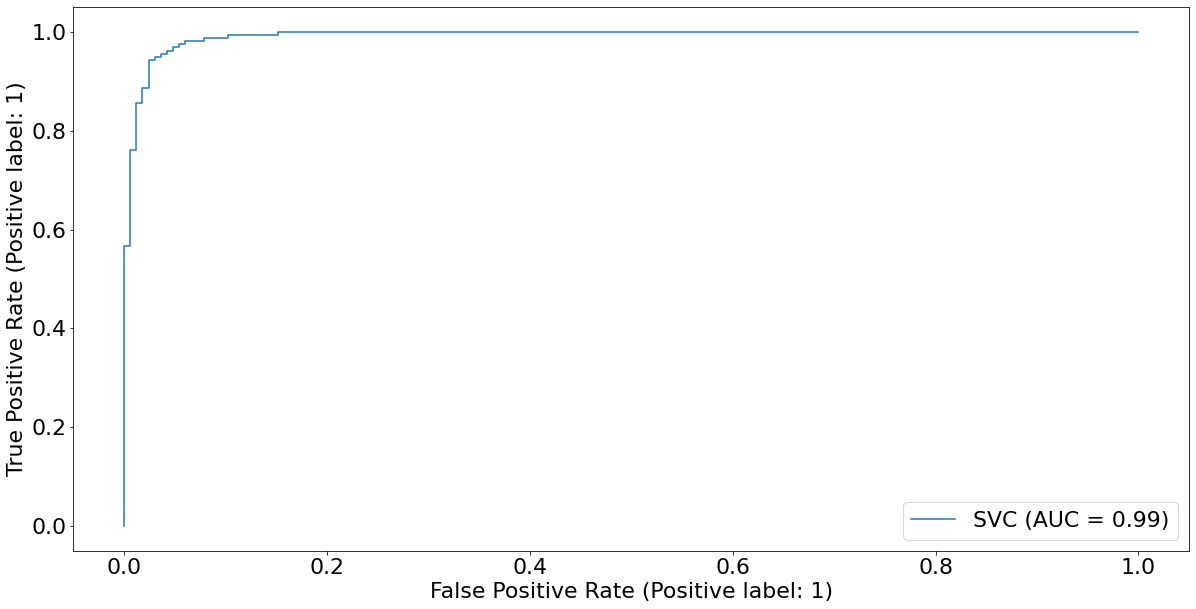

C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


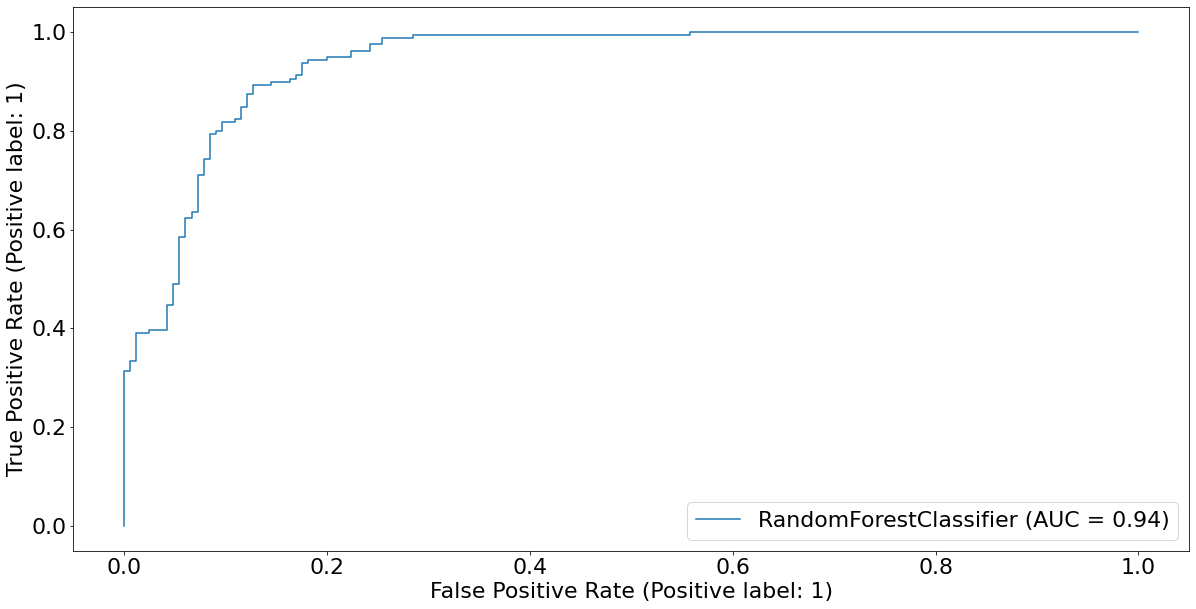

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


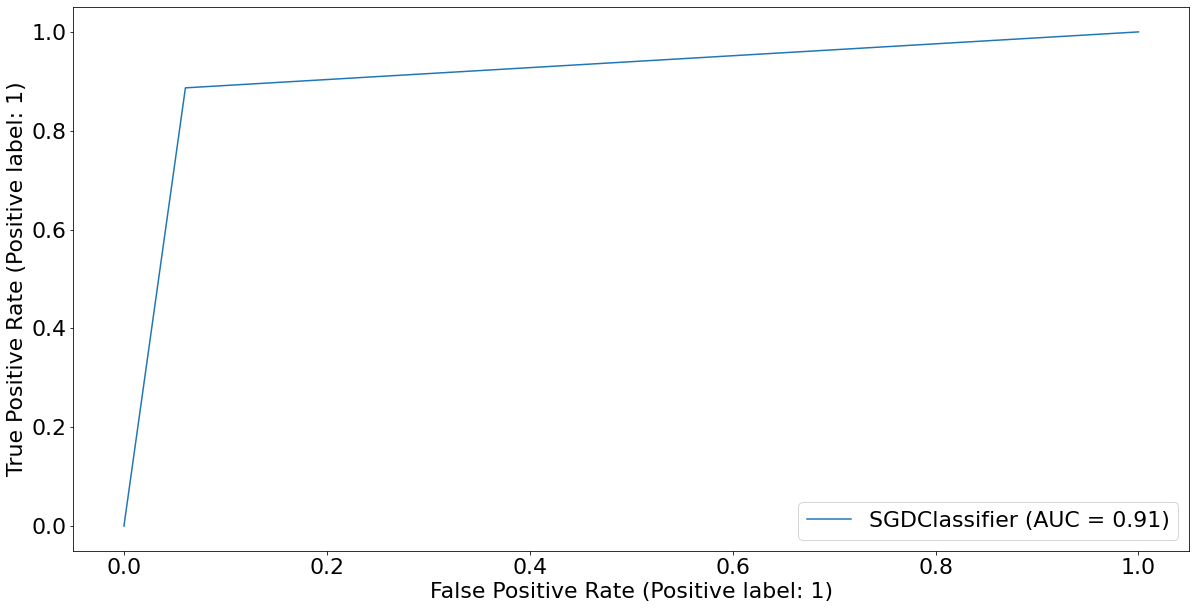

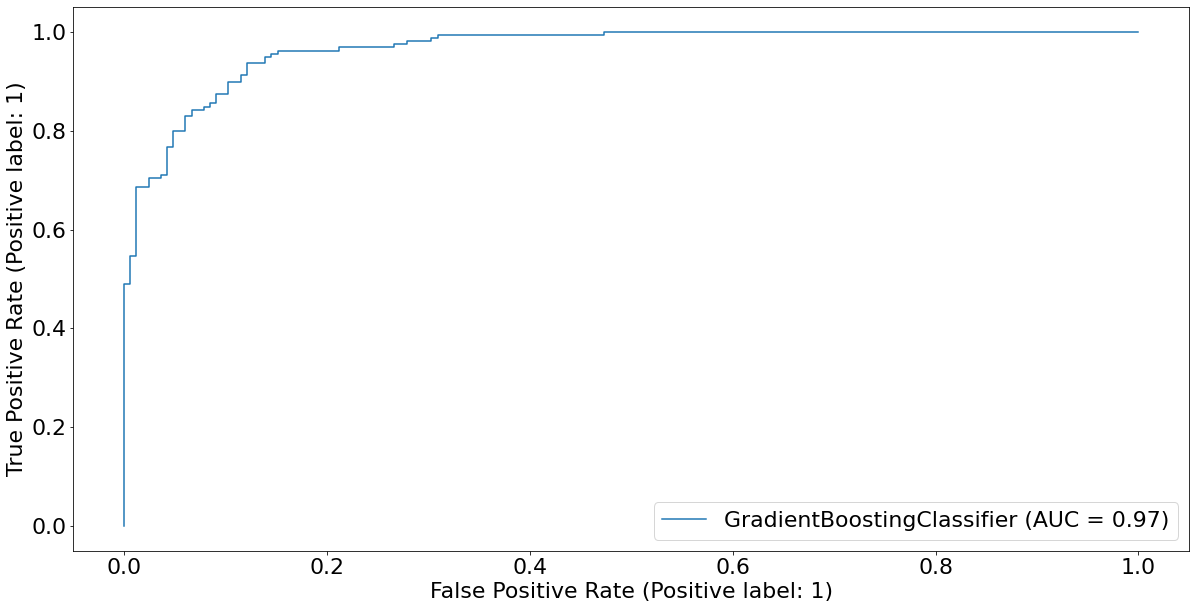

In [27]:
from sklearn.metrics import RocCurveDisplay
#ax = plt.gca()
for classifier_name, classifier in best_clas.items():
    RocCurveDisplay.from_estimator(type(classifier)(**classifier.get_params()).fit(X_train, y_train), X_test, y_test,
                                   #ax=ax
                                  )
    plt.show()

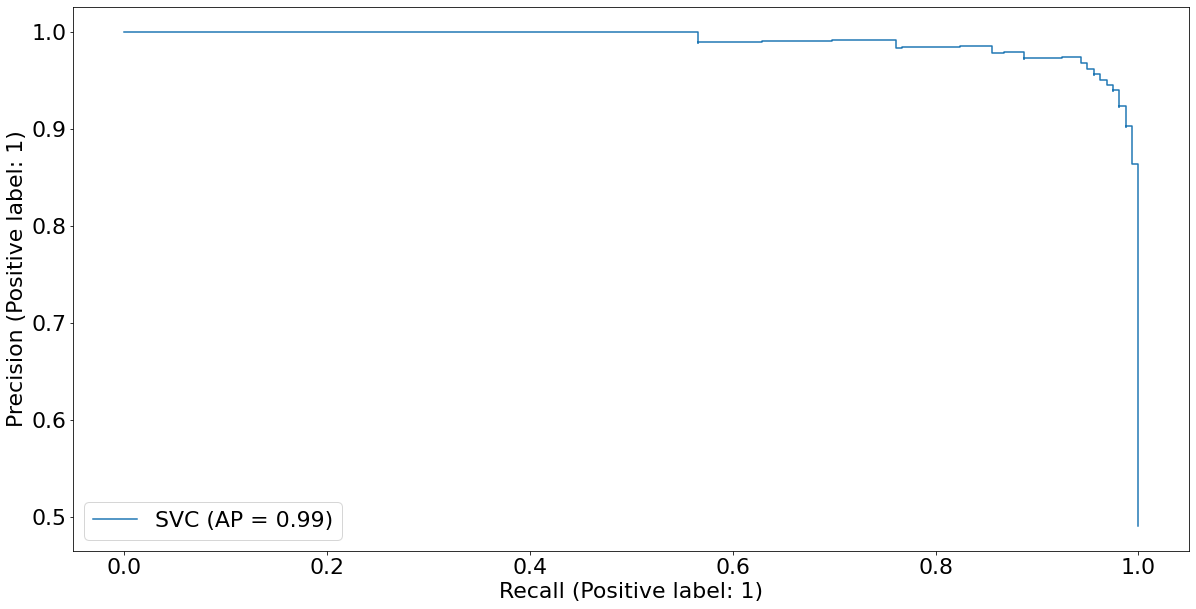

C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


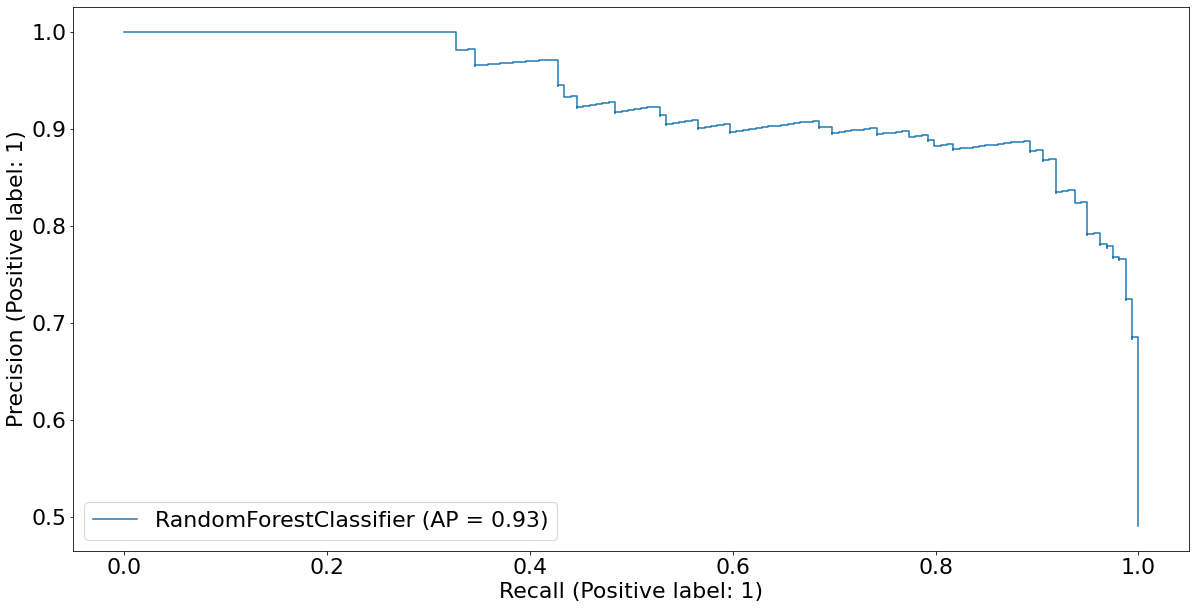

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


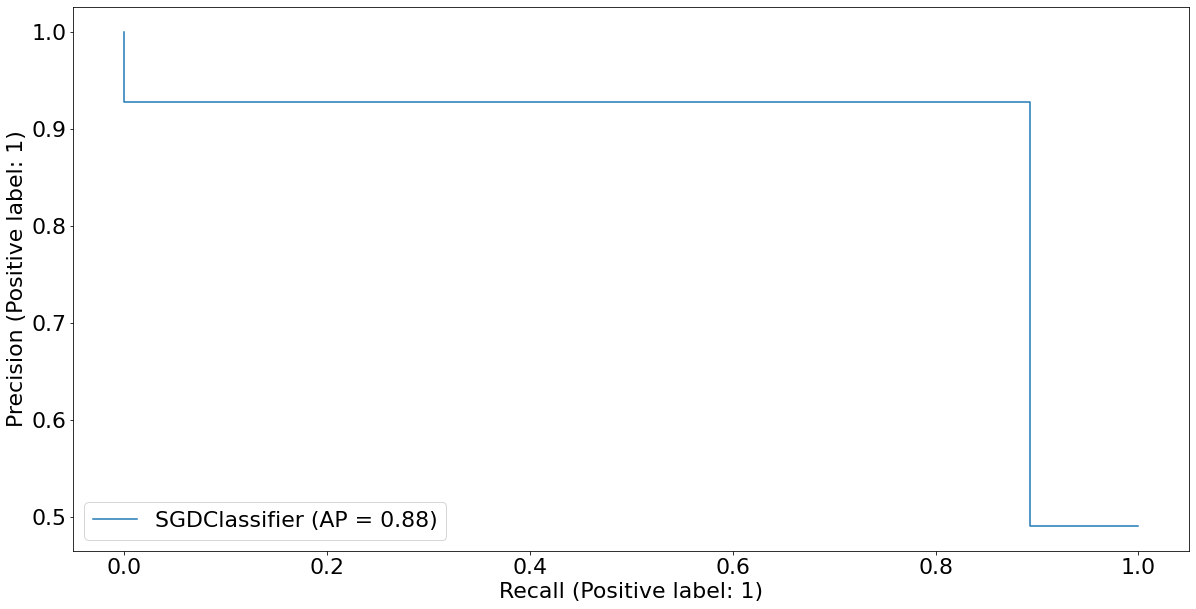

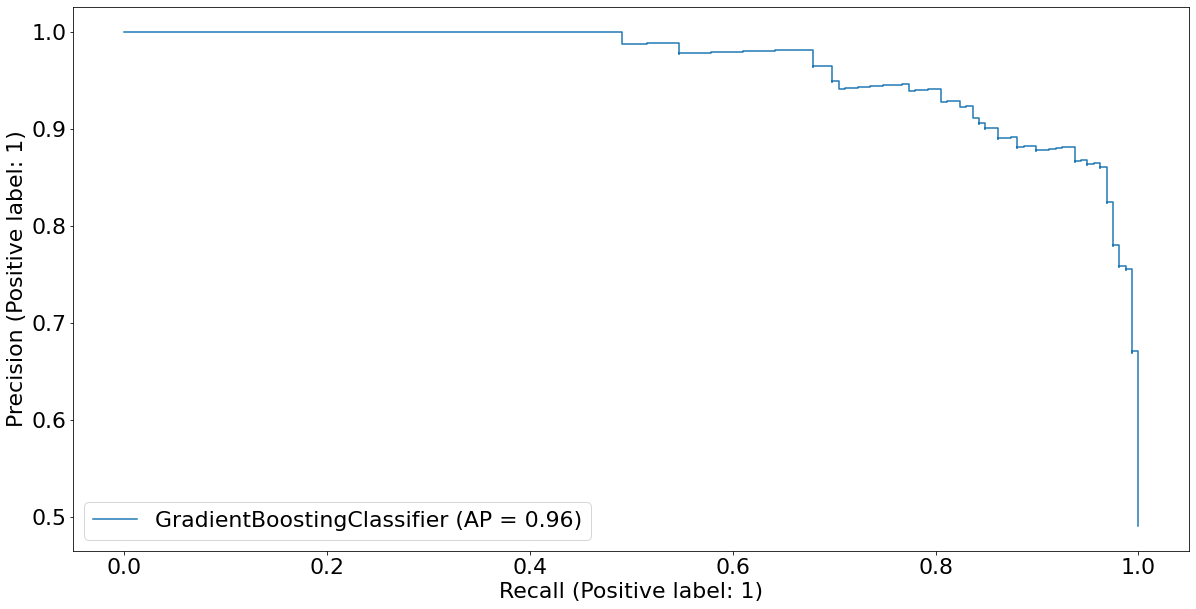

In [24]:
from sklearn.metrics import PrecisionRecallDisplay
# ax = plt.gca()
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
for classifier_name, classifier in best_clas.items():
    PrecisionRecallDisplay.from_estimator(type(classifier)(**classifier.get_params()).fit(X_train, y_train), X_test, y_test, 
                                          #ax=ax
                                         )
    plt.show()

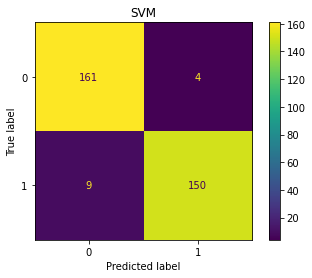

C:\Users\david\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


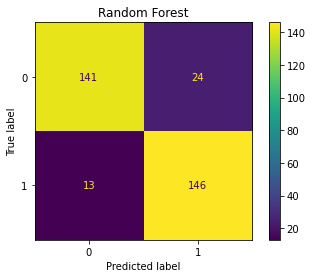

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


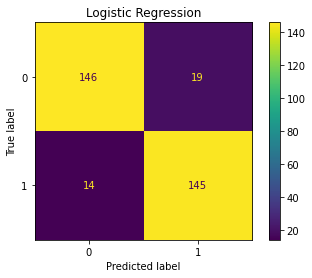

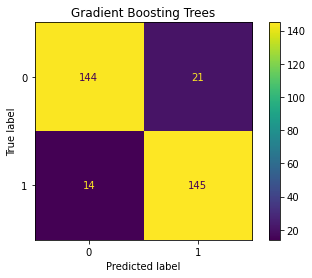

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
d = {
    "svm": "SVM",
    "rf": "Random Forest",
    "log": "Logistic Regression",
    "gbt": "Gradient Boosting Trees"
}
for classifier_name, classifier in best_clas.items():
    ConfusionMatrixDisplay.from_estimator(type(classifier)(**classifier.get_params()).fit(X_train, y_train), X_test, y_test)
    plt.title(d[classifier_name])
    plt.savefig(f"{d[classifier_name]}_cm.png")
    plt.show()

In [59]:
from sklearn.metrics import CalibrationDisplay
ax = plt.gca()
for classifier_name, classifier in classifiers_best.items():
    CalibrationDisplay.from_estimator(type(classifier)(**classifier.get_params()).fit(X_train, y_train), X_test, y_test, ax=ax)

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.metrics' (C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [5]:
data = np.load("simple_data.npz")["arr_0"]
data

array([[30, 30, 34, ..., 27,  0,  0],
       [33, 32, 33, ..., 30, 27,  0],
       [33, 36, 33, ..., 29, 25,  0],
       ...,
       [30, 29, 30, ..., 28, 30, 30],
       [33, 29, 33, ..., 30, 27, 31],
       [37, 35, 28, ..., 28, 35, 32]], dtype=int8)

In [9]:
data["arr_0"]

array([[30, 30, 34, ..., 27,  0,  0],
       [33, 32, 33, ..., 30, 27,  0],
       [33, 36, 33, ..., 29, 25,  0],
       ...,
       [30, 29, 30, ..., 28, 30, 30],
       [33, 29, 33, ..., 30, 27, 31],
       [37, 35, 28, ..., 28, 35, 32]], dtype=int8)

In [155]:
data_random, y_random = shuffle(data["arr_0"], df["Régimen de alimentación"].drop("V060").apply(lambda x: int(x == "Bellota")).to_numpy(),  random_state=42)


In [157]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(data_random[:800], y_random[:800])


C:\Users\david\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [163]:
from sklearn.metrics import classification_report
print(pd.DataFrame(classification_report(y_random[800:], svc.predict(data_random[800:]), output_dict=True)).style.to_latex(caption="Performance of X classifier", label="tab:clas", column_format=""))

\begin{table}
\caption{Performance of X classifier}
\label{tab:clas}
\begin{tabular}{lrrrrr}
 & 0 & 1 & accuracy & macro avg & weighted avg \\
precision & 0.952381 & 0.927835 & 0.939227 & 0.940108 & 0.939633 \\
recall & 0.919540 & 0.957447 & 0.939227 & 0.938494 & 0.939227 \\
f1-score & 0.935673 & 0.942408 & 0.939227 & 0.939040 & 0.939171 \\
support & 87.000000 & 94.000000 & 0.939227 & 181.000000 & 181.000000 \\
\end{tabular}
\end{table}



In [ ]:
print(classifier_name,
          classification_report(y_test, type(classifier)(**classifier.get_params()).fit(transform_df(pd.DataFrame(X_train)), y_train).predict(transform_df(pd.DataFrame(X_test)))))

In [ ]:
from sklearn.metrics import classification_report
def get_name(n: str) -> str:
    prep_dict = {
        "identity": "not applying any preprocessing",
        "onlyTransform": "only applying $f$",
        "onlyFilter": "only filtering the first 1000 columns",
        "transformAndFilter": "both applying function $f$ and filtering the first 1000 columns"
    }
    classifier, preprocessing = n.split("_")
    if classifier.startswith("pa"):
        return f"Passive-Agressive classifier with loss function PA-{'I' if classifier[-1] == '1' else 'II'} when {prep_dict[preprocessing]}"
    elif classifier == "svm":
        return f"Stochastic Gradient Descent with loss function hinge (Linear SVM) when {prep_dict[preprocessing]}"
    elif classifier == "lr":
        return f"Stochastic Gradient Descent with loss function log (Logistic Regression) when {prep_dict[preprocessing]}"
    
    return n
names = {
    "pa1_identity": "Passive-Agressive classifier with no prepro"
}
for classifier, results in classifiers_best.items():
    values = np.array(results)
    print(classifier, pd.DataFrame(classification_report(values[:, 1], values[:, 0], output_dict=True)).style.to_latex(column_format="l|r|r|r|r|r", label=f"tab:{classifier}", caption=f"Results for {get_name(classifier)}").replace("\\\\", "\\\\\\hline"), sep="\n", end="\n\n\n")
    

In [7]:
import joblib
best_clas = joblib.load("best_chunk_classifiers.joblib")
best_clas

{'svm': SVC(C=1, class_weight={0: 0.5, 1: 0.5}, kernel='linear'),
 'rf': RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=5,
                        max_features='auto', n_estimators=200),
 'log': SGDClassifier(alpha=1e-05, class_weight={0: 0.5, 1: 0.5}, loss='log', n_jobs=-1),
 'gbt': GradientBoostingClassifier(loss='exponential', n_estimators=20)}

In [48]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(class_weight={0: 0.5, 1: 0.5}, max_iter=1000, C=1).fit(X_train, y_train)

In [49]:
print(classification_report(y_test, l.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       165
           1       0.97      0.94      0.96       159

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324



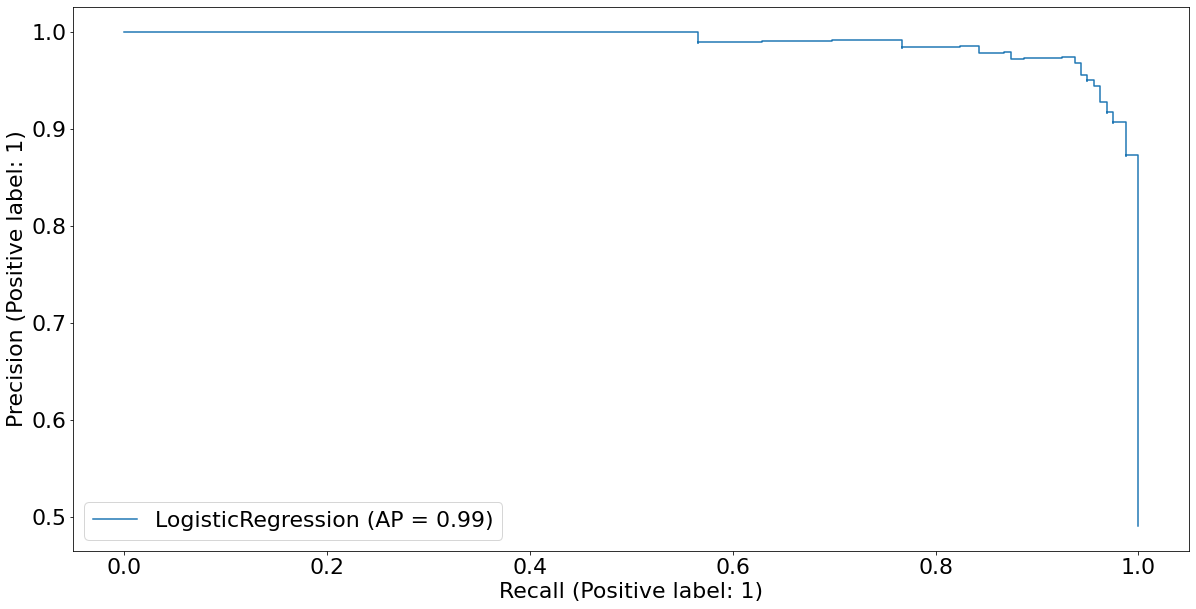

In [50]:
PrecisionRecallDisplay.from_estimator(l, X_test, y_test)

In [52]:
print(pd.DataFrame(classification_report(y_test, l.predict(X_test), output_dict=True)).style.to_latex(column_format="l|r|r|r|r|r", label=f"tab:{classifier_name}", caption=f"Results for {Logistic Regression}").replace("\\\\", "\\\\\\hline"))

\begin{table}
\caption{Results for gbt}
\label{tab:gbt}
\begin{tabular}{l|r|r|r|r|r}
 & 0 & 1 & accuracy & macro avg & weighted avg \\\hline
precision & 0.941520 & 0.973856 & 0.956790 & 0.957688 & 0.957389 \\\hline
recall & 0.975758 & 0.937107 & 0.956790 & 0.956432 & 0.956790 \\\hline
f1-score & 0.958333 & 0.955128 & 0.956790 & 0.956731 & 0.956760 \\\hline
support & 165.000000 & 159.000000 & 0.956790 & 324.000000 & 324.000000 \\\hline
\end{tabular}
\end{table}



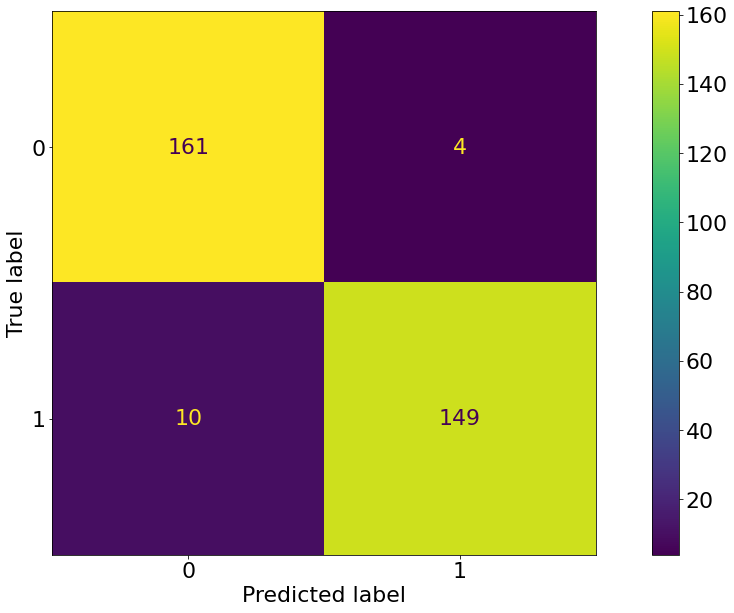

In [54]:
ConfusionMatrixDisplay.from_estimator(l, X_test, y_test)